# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [64]:
import numpy as np
import pandas as pd
data = pd.read_csv("data.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

plans_university = []
past_failures = []
for i in data['plans_universitypast_failures']:
    plans_university.append(int(i/10))
    past_failures.append(i % 10)
data['plans_university'] = plans_university
data['past_failures'] = past_failures
data = data.drop('plans_universitypast_failures', axis=1)

'''
Проблема заключалась в том, что два последних признака слиплись в один и их нужно было разделить
'''

'\nПроблема заключалась в том, что два последних признака слиплись в один и их нужно было разделить\n'

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [65]:
data = data.fillna(data.mean())

In [79]:
#data = data.replace(np.NAN, data.median())

In [67]:
'''
Вторая проблема - собственно и есть пропущенные значения в некоторых колонках данных.
'''

'\nВторая проблема - собственно и есть пропущенные значения в некоторых колонках данных.\n'

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [68]:
for name, values in data.items():
    mx = data[name][0]
    mn = 0
    for i in range(len(data[name])):
        mx = max(mx, data[name][i])
        mn = min(mn, data[name][i])
    for i in range(len(data[name])):
        data[name][i] = (data[name][i] - mn)/(mx - mn)

'''
Из всех способов нормализации я выбрала способ приведения всех данных к промежутку [0, 1]. Это я делаю по формуле
x = (x - xmin)/(xmax - xmin)
'''


C:\Users\DEX\AppData\Local\Temp\ipykernel_31284\1591916561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][i] = (data[name][i] - mn)/(mx - mn)


'\nИз всех способов нормализации я выбрала способ приведения всех данных к промежутку [0, 1]. Это я делаю по формуле\nx = (x - xmin)/(xmax - xmin)\n'

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [69]:
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import utils

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scores = pd.read_csv("scores.csv")

# В строке ниже происходит разделение данных на обучающую и тестовую выборки
# В качестве данных берется data, где хранятся данные об учениках и scores, где хранятся их оценки
# Параметр test_size отвечает за размер тестовой выборки в процентах от всех данных. В моем случае она 25%
# Параметр random_state отвечает за перетасовывание данных перед их разбиением
X_train, X_test, y_train, y_test = train_test_split(data[1:], scores, test_size=0.25, random_state=200)
# В этой строке мы "скармливаем" модели линейной регрессии два параметра, которые мы получили ранее - тестовую выборку
# и разметку для нее. В итоге мы получаем массив коэффициентов wi, которые мы сохраняем в reg
reg = LinearRegression().fit(X_train, y_train)

err_size = 0

y_real = y_test
y_pred = reg.predict(X_test)
for i in range(len(y_pred)):
    err_size += (y_real.values[i] - y_pred[i])**2

print(round(err_size[0], 100))

'''
Я нахожу значение ошибки как сумму (y_pred - y_real)**2. Чем величина ошибки меньше, тем предсказание точнее.
'''

31758.809580413137


'\nЯ нахожу значение ошибки как сумму (y_pred - y_real)**2. Чем величина ошибки меньше, тем предсказание точнее.\n'

In [70]:
data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,0.008036,1.00,1.00,0.02,0.50,1.0,0.8,0.8,0.2,0.4,1.0,1,1,0,1,1,1,0.000000
1,0.008538,1.00,1.00,0.02,0.25,1.0,0.6,0.8,0.2,0.4,1.0,0,1,0,1,1,1,0.000000
2,0.008036,0.25,0.25,0.04,0.25,0.8,1.0,1.0,0.4,0.8,1.0,1,0,1,1,1,1,0.000000
3,0.009041,0.25,0.50,0.04,0.25,0.6,0.8,0.8,0.4,0.8,0.8,1,1,0,1,0,0,0.000000
4,0.008538,0.50,0.25,0.04,0.50,0.8,0.4,1.0,0.2,0.4,1.0,0,0,0,1,1,1,0.000000
5,0.008538,0.50,1.00,0.02,0.50,0.8,0.6,0.4,0.2,0.2,1.0,0,1,1,1,1,1,0.000000
6,0.007534,0.25,0.25,0.06,0.50,0.8,0.4,0.2,0.2,0.4,0.4,0,0,0,1,1,1,0.000000
7,0.007534,0.75,0.75,0.02,1.00,0.8,0.6,0.6,0.2,0.2,0.8,0,1,0,0,1,1,0.000000
8,0.009543,0.25,0.25,0.06,0.25,0.8,0.8,0.8,0.6,0.6,1.0,1,0,0,1,1,1,0.111111
9,0.008538,0.25,0.25,0.02,0.75,0.8,0.6,0.4,0.2,0.4,0.8,0,1,1,1,1,1,0.000000


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [71]:
#Считываем данные из файлов
attendance = pd.read_csv("attendance.csv")

# разделяем данные по ";"
attendance["0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31"][0].split(";")
# добавляем все данные из attendance в data["attendance"]
data["attendance"] = attendance["0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31"]

# считаем количество плюсиков в каждой ячейке и заменяем строку с плюсиками на их количество
for i in range(len(data["attendance"])):
    count = 0
    for j in (data["attendance"][i]):
        if (j == '+'):
            count += 1
    data["attendance"][i] = count

# приводим столбец attendance к типу int
data["attendance"] = data["attendance"].astype(int)


# В файле school_support.txt хранятся номера учеников, получающих мат помощь
# Мы создаем в data колонку "support", изначально заполняемм ее нулями, а потом, к номерам, хранящимся в файле
# проставляем в этой колонке единицы
school_support = open("school_support.txt")
numbers_sup = school_support.readlines()

data["support"] = 0

for num in numbers_sup:
    data["support"][int(num)] = 1


C:\Users\DEX\AppData\Local\Temp\ipykernel_31284\1910701911.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["attendance"][i] = count
C:\Users\DEX\AppData\Local\Temp\ipykernel_31284\1910701911.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["support"][int(num)] = 1


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

'\nВидно, что есть небольшое кол-во данных, сильно отличающихся от остальных. Это выглядит подозрительно, учитывая, что\nвозраст всех школников примерно одинаковый.\n'

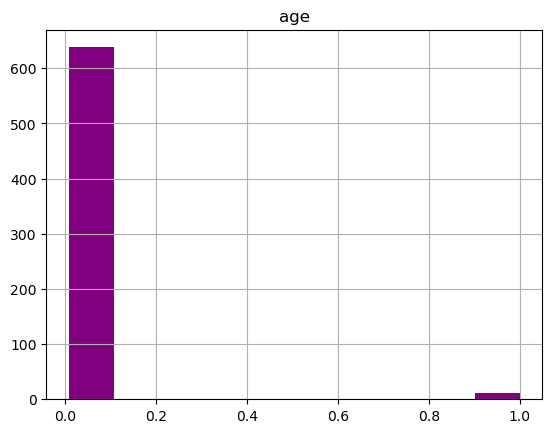

In [72]:
data.hist(column="age", grid=True, color = "purple")

'''
Видно, что есть небольшое кол-во данных, сильно отличающихся от остальных. Это выглядит подозрительно, учитывая, что
возраст всех школников примерно одинаковый.
'''

array([[<Axes: title={'center': 'support'}>]], dtype=object)

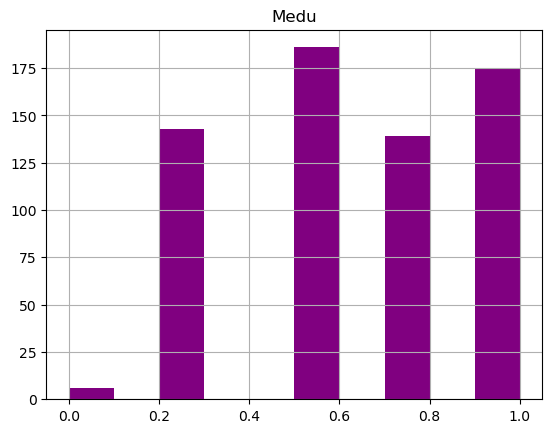

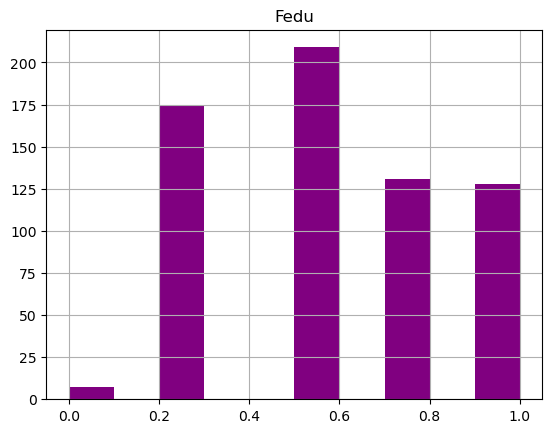

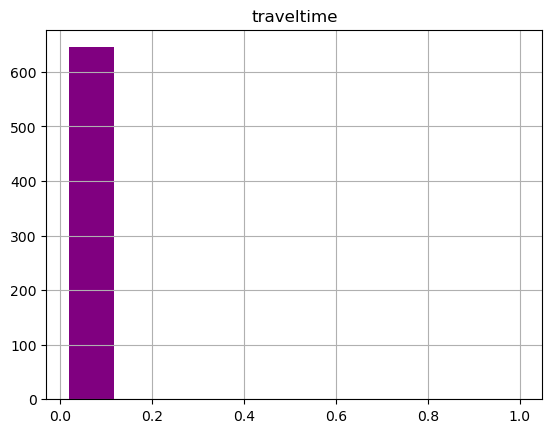

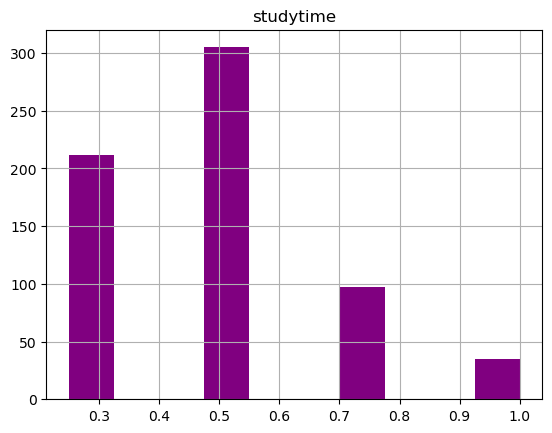

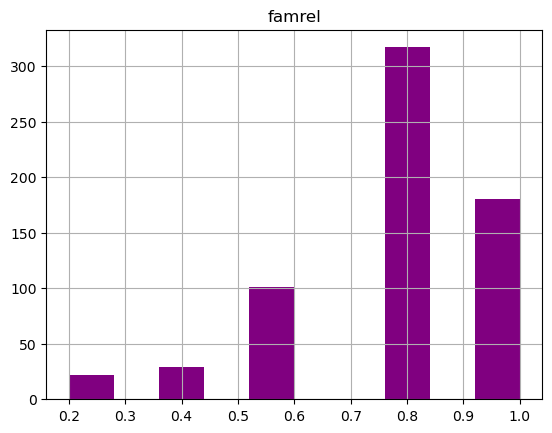

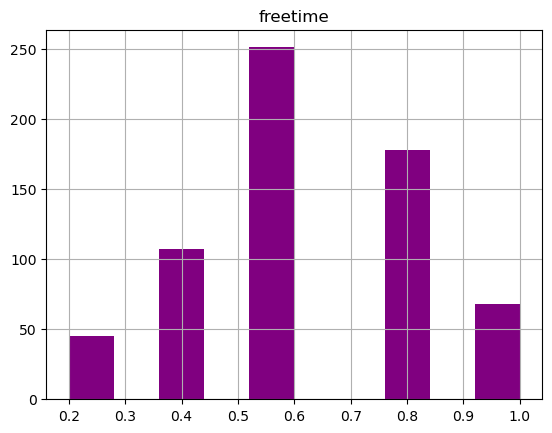

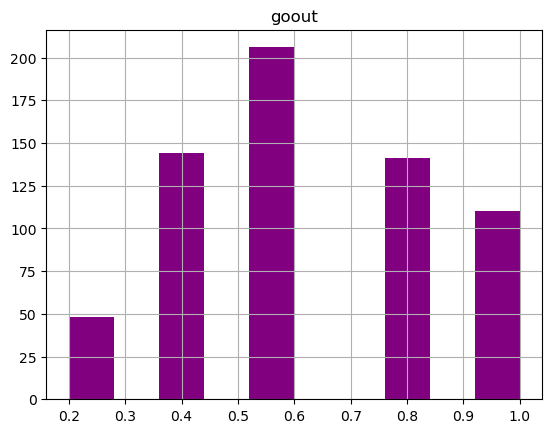

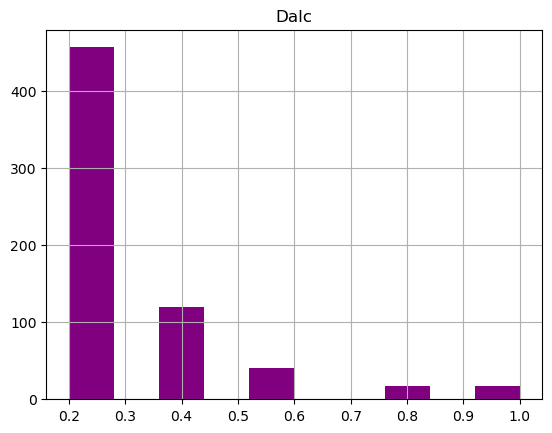

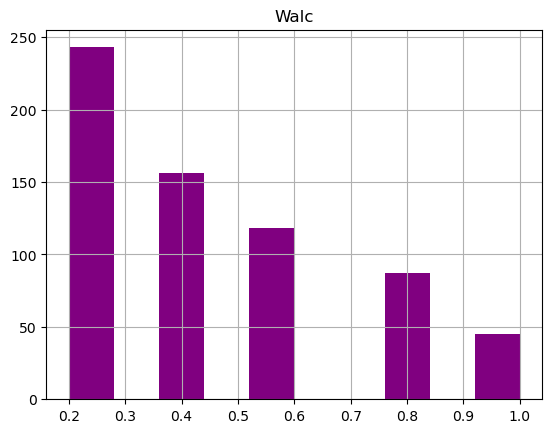

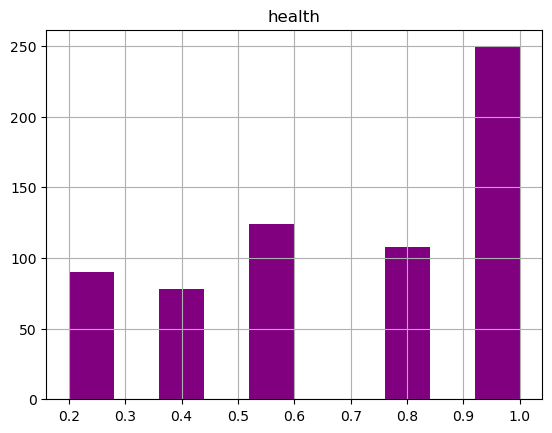

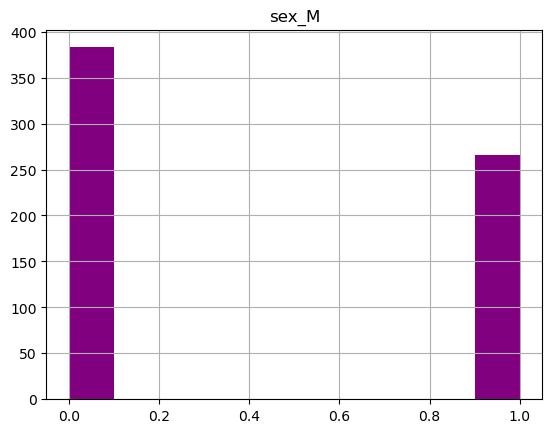

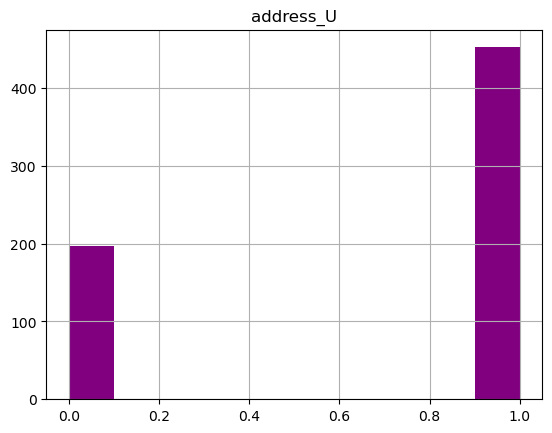

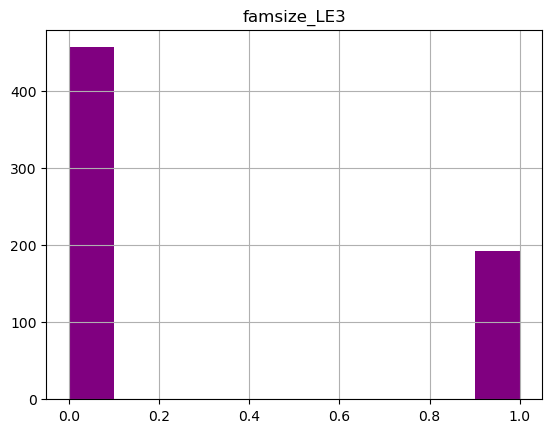

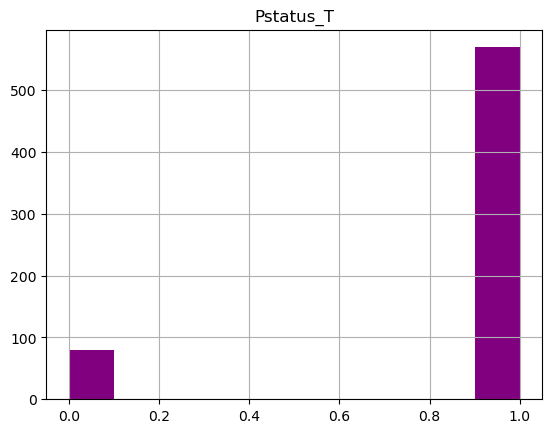

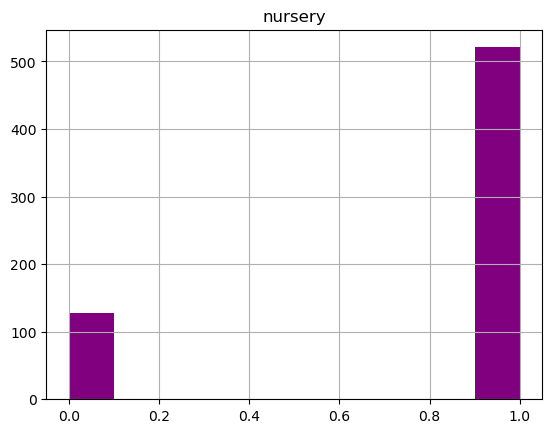

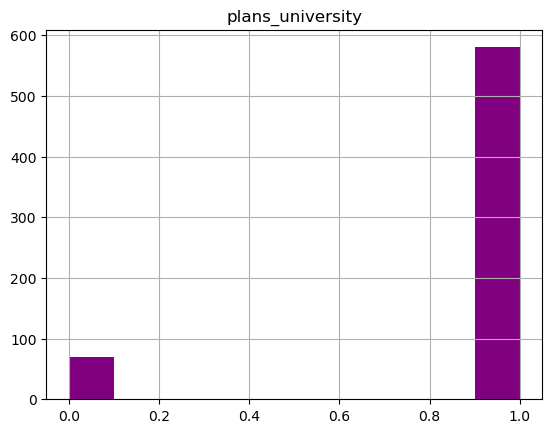

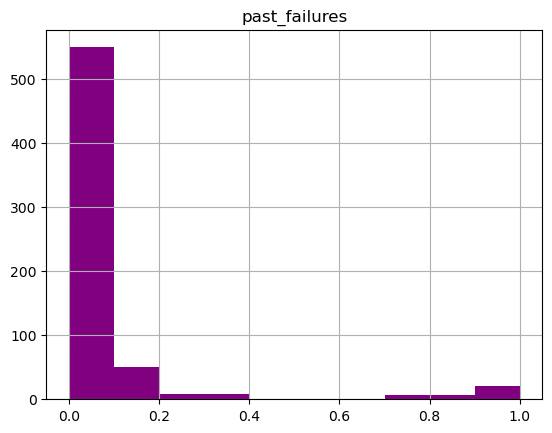

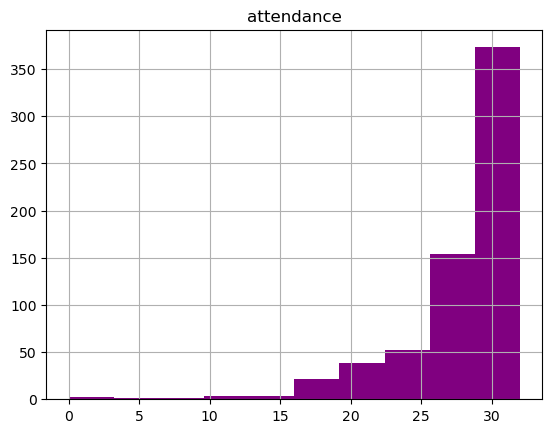

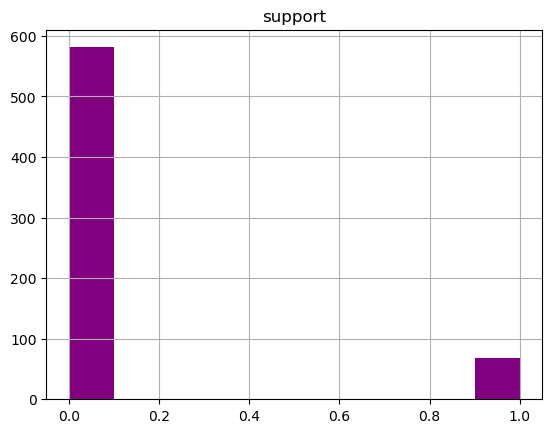

In [73]:
data.hist(column="Medu", grid=True, color = "purple")
data.hist(column="Fedu", grid=True, color = "purple")
data.hist(column="traveltime", grid=True, color = "purple")
data.hist(column="studytime", grid=True, color = "purple")
data.hist(column="famrel", grid=True, color = "purple")
data.hist(column="freetime", grid=True, color = "purple")
data.hist(column="goout", grid=True, color = "purple")
data.hist(column="Dalc", grid=True, color = "purple")
data.hist(column="Walc", grid=True, color = "purple")
data.hist(column="health", grid=True, color = "purple")
data.hist(column="sex_M", grid=True, color = "purple")
data.hist(column="address_U", grid=True, color = "purple")
data.hist(column="famsize_LE3", grid=True, color = "purple")
data.hist(column="Pstatus_T", grid=True, color = "purple")
data.hist(column="nursery", grid=True, color = "purple")
data.hist(column="plans_university", grid=True, color = "purple")
data.hist(column="past_failures", grid=True, color = "purple")
data.hist(column="attendance", grid=True, color = "purple")
data.hist(column="support", grid=True, color = "purple")


In [74]:
'''
Остальные гистограммы подозрительно не выглядят.
'''

'\nОстальные гистограммы подозрительно не выглядят.\n'

In [75]:
# Исправление найденных ошибок

for i in range(len(data['age'])):
    if (data['age'][i] > 1000):
        data['age'][i] = 2006 - data['age'][i]
'''
Третья проблема: некоторые значения колонки age представляют собой год рождения, а не возраст.
'''

sum_tt = 0
cnt_tt = 0
for i in data['traveltime']:
    if (1 <= i <= 4):
        sum_tt += i
        cnt_tt += 1

mid_tt = int(sum_tt/cnt_tt)

for i in range(len(data['traveltime'])):
    if not (1 <= data['traveltime'][i] <= 4):
        data['traveltime'][i] = mid_tt

data['traveltime'] = data['traveltime'].astype(int)
        
'''
Четвертая проблема была в том, что в признаке traveltime были странные значения, не входящие в диапазон [1, 4]. Тут нужно было как-то
заменить некорректные данные, либо избавиться от них. Я решила заменить их на среднее значение по столбцу.
'''

C:\Users\DEX\AppData\Local\Temp\ipykernel_31284\766164172.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['traveltime'][i] = mid_tt


'\nЧетвертая проблема была в том, что в признаке traveltime были странные значения, не входящие в диапазон [1, 4]. Тут нужно было как-то\nзаменить некорректные данные, либо избавиться от них. Я решила заменить их на среднее значение по столбцу.\n'

In [76]:
data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,support
0,0.008036,1.00,1.00,1,0.50,1.0,0.8,0.8,0.2,0.4,1.0,1,1,0,1,1,1,0.000000,26,0
1,0.008538,1.00,1.00,1,0.25,1.0,0.6,0.8,0.2,0.4,1.0,0,1,0,1,1,1,0.000000,30,0
2,0.008036,0.25,0.25,1,0.25,0.8,1.0,1.0,0.4,0.8,1.0,1,0,1,1,1,1,0.000000,32,0
3,0.009041,0.25,0.50,1,0.25,0.6,0.8,0.8,0.4,0.8,0.8,1,1,0,1,0,0,0.000000,22,0
4,0.008538,0.50,0.25,1,0.50,0.8,0.4,1.0,0.2,0.4,1.0,0,0,0,1,1,1,0.000000,32,0
5,0.008538,0.50,1.00,1,0.50,0.8,0.6,0.4,0.2,0.2,1.0,0,1,1,1,1,1,0.000000,24,0
6,0.007534,0.25,0.25,1,0.50,0.8,0.4,0.2,0.2,0.4,0.4,0,0,0,1,1,1,0.000000,32,0
7,0.007534,0.75,0.75,1,1.00,0.8,0.6,0.6,0.2,0.2,0.8,0,1,0,0,1,1,0.000000,22,1
8,0.009543,0.25,0.25,1,0.25,0.8,0.8,0.8,0.6,0.6,1.0,1,0,0,1,1,1,0.111111,28,0
9,0.008538,0.25,0.25,1,0.75,0.8,0.6,0.4,0.2,0.4,0.8,0,1,1,1,1,1,0.000000,22,0


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [77]:
'''
from sklearn import linear_model
regression = linear_model.LinearRegression().fit(data[:-1], scores) #create model and train it
prediction = regression.predict(data["age"])
error = (prediction - scores)**2 #simple error - square error
print(error)
'''

# Я не поняла, как делать это задание

'\nfrom sklearn import linear_model\nregression = linear_model.LinearRegression().fit(data[:-1], scores) #create model and train it\nprediction = regression.predict(data["age"])\nerror = (prediction - scores)**2 #simple error - square error\nprint(error)\n'

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [78]:
# В строке ниже происходит разделение данных на обучающую и тестовую выборки
# В качестве данных берется data, где хранятся данные об учениках и scores, где хранятся их оценки
# Параметр test_size отвечает за размер тестовой выборки в процентах от всех данных. В моем случае она 25%
# Параметр random_state отвечает за перетасовывание данных перед их разбиением
X_train, X_test, y_train, y_test = train_test_split(data[1:], scores, test_size=0.25, random_state=200)
# В этой строке мы "скармливаем" модели линейной регрессии два параметра, которые мы получили ранее - тестовую выборку
# и разметку для нее. В итоге мы получаем массив коэффициентов wi, которые мы сохраняем в reg
reg = LinearRegression().fit(X_train, y_train)

err_size = 0

y_real = y_test
y_pred = reg.predict(X_test)
for i in range(len(y_pred)):
    err_size += (y_real.values[i] - y_pred[i])**2

print(round(err_size[0], 100))

30511.770776947556


Вывод:
1) При использовании в задаче 2 для выравнивания замены на среднее, ошибка модели составляла 31733.08957540745 и 
30483.455054315808 до и после "борьбы с выбросами" соответственно.

2) При использовании в задаче 2 для выравнивания замены на медиану, ошибка модели составляла 31758.809580413137 и 
30511.770776947556 до и после "борьбы с выбросами" соответственно.

Значит, в случае данной модели выгоднее провести замену на медиану и обязательно сделать "борьбу с выбросами".